In [ ]:
#%%capture   # Uncomment to supress output
!pip install pycaret[full]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from google.colab import drive
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [ ]:
dataset = pd.read_csv('gdrive/MyDrive/Colab Notebooks/AnomalyDetection/creditcard.csv')

In [ ]:
dataset.shape

(284807, 31)

In [ ]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Separate a training set and validation set:

N = 80000     # Size of subsample to consider
#Frac = 0.95   # Fraction of data to consider for validation
Frac = 0.7

#First, take a random sample of N rows. Do this to cut down on computation time.
#dataset = dataset.sample(n=N, random_state=42)

df_train = dataset.sample(frac=Frac, random_state=123)
df_valid = dataset.drop(df_train.index)

df_train.reset_index(drop=True, inplace=True)
df_valid.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(df_train.shape))
print('Unseen Data For Predictions: ' + str(df_valid.shape))

Data for Modeling: (199365, 31)
Unseen Data For Predictions: (85442, 31)


In [ ]:
# For the unsupervised problem: drop the 'Class' column

df_train_unsup = df_train.drop('Class', axis=1)
df_train_unsup.shape

(199365, 30)

In [ ]:
df_valid_unsup = df_valid.drop('Class', axis=1)
df_valid_unsup.shape

(85442, 30)

In [ ]:
# import pycaret classification and init setup

from pycaret.classification import *

supervised = setup(df_train, target = 'Class', session_id = 123, fold = 2, test_data = df_valid, index = False)

# See https://pycaret.readthedocs.io/en/stable/api/classification.html for more details about what settings to pass the setup function.
# The settings 'test_data = df_valid, index = False' tell the setup function to use my holdout set 'df_valid' as the test set to compute metrics (acc, prec, recall...)
# The setting 'fold = 2' is to reduce the k-fold to the minimum. This setting is redundant later as we will turn off
  # cross validation later with 'model_rf = create_model('rf',cross_validation=False)'. We do this for faster run time for this specific experiment.
  # It is usually a good idea to pursue cross validation, but we turn it off to keep the narrative of the project simple.

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Original data shape,"(284807, 31)"
4,Transformed data shape,"(284807, 31)"
5,Transformed train set shape,"(199365, 31)"
6,Transformed test set shape,"(85442, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [ ]:
type(supervised)

pycaret.classification.oop.ClassificationExperiment

In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
import time

tic = time.time()


model_rf = create_model('rf',cross_validation=False)
print(model_rf)


toc = time.time()
print('Time elapsed, ', toc-tic)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Test,0.9995,0.9370,0.7698,0.9386,0.8458,0.8456,0.8498


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
Time elapsed,  237.6922733783722


In [ ]:
holdout_pred = predict_model(model_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9995,0.9370,0.7698,0.9386,0.8458,0.8456,0.8498


In [ ]:
unseen_predictions_rf = predict_model(model_rf, data=df_valid)
unseen_predictions_rf.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9995,0.9370,0.7698,0.9386,0.8458,0.8456,0.8498


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,prediction_label,prediction_score
0,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0,0,1.0
1,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.799999,0,0,1.0
2,10.0,1.249999,-1.221637,0.383930,-1.234899,-1.485420,-0.753230,-0.689405,-0.227487,-2.094011,...,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,121.500000,0,0,1.0
3,16.0,0.694885,-1.361819,1.029221,0.834159,-1.191209,1.309109,-0.878586,0.445290,-0.446196,...,-0.050881,-0.304215,0.072001,-0.422234,0.086553,0.063499,231.710007,0,0,1.0
4,23.0,1.322707,-0.174041,0.434555,0.576038,-0.836758,-0.831083,-0.264905,-0.220982,-1.071425,...,-0.037710,0.347151,0.559639,-0.280158,0.042335,0.028822,16.000000,0,0,1.0


In [ ]:
m = unseen_predictions_rf['prediction_score'].min()
M = unseen_predictions_rf['prediction_score'].max()

print('min = ', m, 'max = ', M)

min =  0.51 max =  1.0


In [ ]:
mask = df_valid['Class'] == 1

In [ ]:
df_valid[mask]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
164,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
188,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
1861,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1
1916,7891.0,-1.585505,3.261585,-4.137422,2.357096,-1.405043,-1.879437,-3.513687,1.515607,-1.207166,...,0.501543,-0.546869,-0.076584,-0.425550,0.123644,0.321985,0.264028,0.132817,1.00,1
1952,8169.0,0.857321,4.093912,-7.423894,7.380245,0.973366,-2.730762,-1.496497,0.543015,-2.351190,...,0.375026,0.145400,0.240603,-0.234649,-1.004881,0.435832,0.618324,0.148469,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76255,156685.0,-0.129778,0.141547,-0.894702,-0.457662,0.810608,-0.504723,1.373588,-0.209476,0.208494,...,-0.032643,-0.246526,0.484108,0.359637,-0.435972,-0.248480,0.021527,0.109192,187.11,1
77496,158638.0,-5.976119,-7.196980,-5.388316,5.104799,4.676533,-5.566870,-4.291180,0.876531,-1.075478,...,1.459369,-0.136262,0.848177,-0.269916,-1.095060,-0.710905,0.565846,-1.034107,296.00,1
78932,160791.0,2.132386,0.705608,-3.530759,0.514779,1.527175,-1.716268,1.132791,-0.574214,0.128904,...,0.163739,0.703910,-0.245076,0.460049,0.920281,-0.216586,-0.026219,-0.025001,1.00,1
78996,160895.0,-0.848290,2.719882,-6.199070,3.044437,-3.301910,-1.992117,-3.734902,1.520079,-2.548788,...,1.125229,0.805258,0.199119,0.035206,0.012159,0.601658,0.137468,-0.171397,127.14,1


In [ ]:
unseen_predictions_rf[mask]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,prediction_label,prediction_score
164,406.0,-2.312227,1.951992,-1.609851,3.997905,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.000000,1,1,0.65
188,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.000000,1,0,1.00
1861,7526.0,0.008430,4.137837,-6.240696,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.000000,1,1,0.90
1916,7891.0,-1.585505,3.261585,-4.137422,2.357096,-1.405043,-1.879437,-3.513687,1.515607,-1.207166,...,-0.076584,-0.425550,0.123644,0.321985,0.264028,0.132817,1.000000,1,1,0.99
1952,8169.0,0.857321,4.093912,-7.423893,7.380245,0.973366,-2.730762,-1.496497,0.543015,-2.351190,...,0.240603,-0.234649,-1.004881,0.435832,0.618324,0.148469,1.000000,1,1,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76255,156685.0,-0.129778,0.141547,-0.894702,-0.457662,0.810608,-0.504723,1.373587,-0.209476,0.208494,...,0.484108,0.359637,-0.435972,-0.248480,0.021527,0.109192,187.110001,1,0,1.00
77496,158638.0,-5.976120,-7.196980,-5.388316,5.104799,4.676533,-5.566870,-4.291181,0.876531,-1.075478,...,0.848177,-0.269916,-1.095060,-0.710905,0.565846,-1.034107,296.000000,1,1,0.57
78932,160791.0,2.132386,0.705608,-3.530759,0.514779,1.527175,-1.716268,1.132791,-0.574214,0.128904,...,-0.245076,0.460049,0.920281,-0.216586,-0.026219,-0.025001,1.000000,1,0,1.00
78996,160895.0,-0.848290,2.719882,-6.199070,3.044437,-3.301909,-1.992117,-3.734902,1.520079,-2.548788,...,0.199119,0.035206,0.012159,0.601658,0.137468,-0.171397,127.139999,1,1,0.96


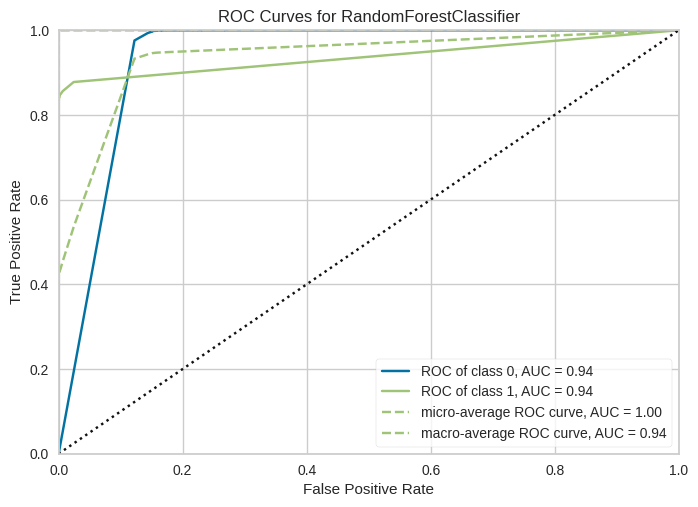

In [ ]:
plot_model(model_rf, plot = 'auc')

In [ ]:
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

In [ ]:
tic = time.time()


model_xg = create_model('xgboost', cross_validation=False)
print(model_xg)


toc = time.time()
print('Time elapsed, ', toc-tic)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Test,0.9996,0.9778,0.7842,0.9646,0.8651,0.8649,0.8695


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)
Time elapsed,  140.67501401901245


In [ ]:
unseen_predictions_xg = predict_model(model_xg, data=df_valid)
unseen_predictions_xg.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9996,0.9778,0.7842,0.9646,0.8651,0.8649,0.8695


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,prediction_label,prediction_score
0,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0,0,1.0
1,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.799999,0,0,1.0
2,10.0,1.249999,-1.221637,0.383930,-1.234899,-1.485420,-0.753230,-0.689405,-0.227487,-2.094011,...,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,121.500000,0,0,1.0
3,16.0,0.694885,-1.361819,1.029221,0.834159,-1.191209,1.309109,-0.878586,0.445290,-0.446196,...,-0.050881,-0.304215,0.072001,-0.422234,0.086553,0.063499,231.710007,0,0,1.0
4,23.0,1.322707,-0.174041,0.434555,0.576038,-0.836758,-0.831083,-0.264905,-0.220982,-1.071425,...,-0.037710,0.347151,0.559639,-0.280158,0.042335,0.028822,16.000000,0,0,1.0


In [ ]:
m = unseen_predictions_xg['prediction_score'].min()
M = unseen_predictions_xg['prediction_score'].max()

print('min = ', m, 'max = ', M)

min =  0.5023 max =  1.0


In [ ]:
# Now for the unsupervised algorithms

In [ ]:
from pycaret.anomaly import *

#unsup = setup(df_train_unsup, normalize = True, session_id = 123)



In [ ]:
#tic = time.time()
#
#model_lof = create_model('lof')
#print(model_lof)
#
#toc = time.time()
#print('Time elapsed, ', toc-tic)


In [ ]:
#tic = time.time()
#
#unseen_predictions_lof = predict_model(model_lof, data=df_valid_unsup)
#unseen_predictions_lof.head()
#
#toc = time.time()
#print('Time elapsed, ', toc-tic)



In [ ]:
#unseen_predictions_lof[unseen_predictions_lof['Anomaly'] == 1]

In [ ]:
# Notice that the Anomaly Scores are not in the range [0,1].
# We want to plot them on a similar axis as the Prediction Scores for the above two models (in the Prec/Recall curves).
# So, we will normalize the Anomaly Scores

#m_lof = unseen_predictions_lof['Anomaly_Score'].min()
#M_lof = unseen_predictions_lof['Anomaly_Score'].max()

#print('min = ', m_lof, 'max = ', M_lof)

In [ ]:
# Notice that LOF can be trained on the training set and then applied to an unseen validation set.

# However, KNN needs to be recomputed every time it sees new data. We will train it on the validation set itself.

# This means we can see how LOF generalizes. We don't see how KNN generalizes, but instead see how it performs on smaller sets.


In [ ]:
unsup_valid = setup(df_valid_unsup, normalize = True, session_id = 123)


,Description,Value
0,Session id,123
1,Original data shape,"(85442, 30)"
2,Transformed data shape,"(85442, 30)"
3,Numeric features,30
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


In [ ]:
tic = time.time()

model_lof = create_model('lof', fraction=.002)
print(model_lof)

toc = time.time()
print('Time elapsed, ', toc-tic)


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

LOF(algorithm='auto', contamination=0.002, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=-1, n_neighbors=20, novelty=True, p=2)
Time elapsed,  66.14803576469421


In [ ]:
tic = time.time()


predictions_lof = assign_model(model_lof)
predictions_lof.head()


toc = time.time()
print('Time elapsed, ', toc-tic)



Time elapsed,  0.016919612884521484


In [ ]:
m_lof = predictions_lof['Anomaly_Score'].min()
M_lof = predictions_lof['Anomaly_Score'].max()

print('min = ', m_lof, 'max = ', M_lof)

min =  0.8985568 max =  369.3579


In [ ]:
tic = time.time()

model_knn = create_model('knn', fraction = .002)
print(model_knn)

toc = time.time()
print('Time elapsed, ', toc-tic)



Processing:   0%|          | 0/3 [00:00<?, ?it/s]

KNN(algorithm='auto', contamination=0.002, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
  radius=1.0)
Time elapsed,  56.665098905563354


In [ ]:
predictions_knn = assign_model(model_knn)
predictions_knn.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Anomaly,Anomaly_Score
0,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0,2.534434
1,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.799999,0,4.566792
2,10.0,1.249999,-1.221637,0.383930,-1.234899,-1.485420,-0.753230,-0.689405,-0.227487,-2.094011,...,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,121.500000,0,1.368786
3,16.0,0.694885,-1.361819,1.029221,0.834159,-1.191209,1.309109,-0.878586,0.445290,-0.446196,...,-0.571955,-0.050881,-0.304215,0.072001,-0.422234,0.086553,0.063499,231.710007,0,2.071775
4,23.0,1.322707,-0.174041,0.434555,0.576038,-0.836758,-0.831083,-0.264905,-0.220982,-1.071425,...,-0.323357,-0.037710,0.347151,0.559639,-0.280158,0.042335,0.028822,16.000000,0,1.572198


In [ ]:

m_knn = predictions_knn['Anomaly_Score'].min()
M_knn = predictions_knn['Anomaly_Score'].max()

print('min = ', m_knn, 'max = ', M_knn)

min =  0.0 max =  92.822453170017


In [ ]:
# Extract the original true labels and the predicted probabilities from the various models.

y_true = df_valid['Class']
#y_true = abs(y_true-1)

y_rf = unseen_predictions_rf['prediction_score']
y_rf = abs(y_rf-1)
y_rf = y_rf/y_rf.max()

y_xg = unseen_predictions_xg['prediction_score']
y_xg = abs(y_xg-1)
y_xg = y_xg/y_xg.max()

#y_lof = unseen_predictions_lof['Anomaly_Score']- m_lof
#y_lof = y_lof/y_lof.max()
y_lof = predictions_lof['Anomaly_Score']- m_lof
y_lof = y_lof/y_lof.max()


y_knn = predictions_knn['Anomaly_Score']- m_knn
y_knn = y_knn/y_knn.max()




In [ ]:
# Check that the above probabilities are in the right ballpark
y_true.info

<bound method Series.info of 0        0
1        0
2        0
3        0
4        0
        ..
85437    0
85438    0
85439    0
85440    0
85441    0
Name: Class, Length: 85442, dtype: int64>

In [ ]:
# The Class = 1 is the positive class, corresponding to a truely fraudulent transaction.
y_true.value_counts()

0    85303
1      139
Name: Class, dtype: int64

In [ ]:
# Checking rf
# Most transactions have Predicted Probability = 0% of being fraudulent.

# The pred probs from rf are quite discrete:

y_rf.value_counts()

0.000000    83263
0.020408     1523
0.040816      306
0.061224      105
0.081633       59
0.102041       42
0.142857       18
0.122449       13
0.204082        9
0.183673        9
0.163265        9
0.224490        8
0.326531        7
0.265306        7
0.244898        6
0.306122        5
0.346939        5
0.959184        4
0.551020        3
0.428571        3
0.632653        3
0.448980        3
0.387755        3
0.571429        3
0.285714        3
0.530612        2
0.877551        2
0.489796        2
0.897959        2
0.734694        2
0.653061        2
0.367347        1
0.755102        1
0.836735        1
0.714286        1
0.795918        1
0.775510        1
1.000000        1
0.469388        1
0.510204        1
0.612245        1
0.918367        1
Name: prediction_score, dtype: int64

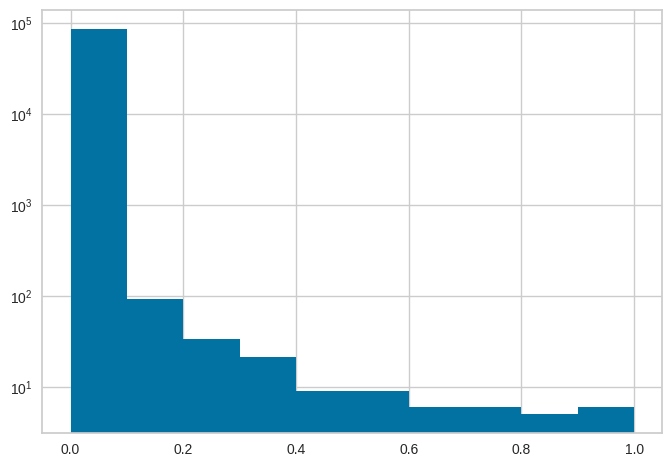

In [ ]:
plt.hist(y_rf)
plt.yscale('log')
plt.show()

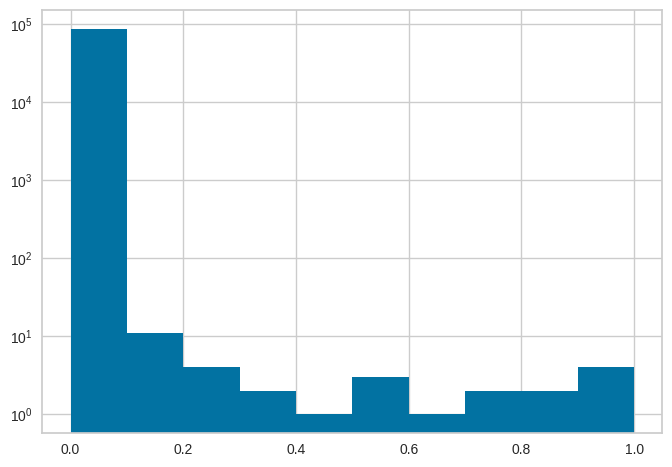

In [ ]:
# The predicted probabilities from xg seem to be clumped near 0%. So clumped I need a log scale on the y-axis to show the histogram:
plt.hist(y_xg)
plt.yscale('log')
plt.show()

In [ ]:
y_xg.max()

1.0

In [ ]:
y_xg.head(20)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
Name: prediction_score, dtype: float32

In [ ]:
y_xg.value_counts()

0.000000    81497
0.000201     2212
0.000402      573
0.000603      264
0.000804      169
            ...  
0.048021        1
0.076150        1
0.099859        1
0.104481        1
0.053647        1
Name: prediction_score, Length: 149, dtype: int64

In [ ]:
# Now look at y_lof:
y_lof.max()

1.0

In [ ]:
y_lof.min()

0.0

In [ ]:
# The values from lof are more continuous. Not specifically clustered at 0%
y_lof.value_counts()

0.000264    9
0.000674    6
0.000674    5
0.001003    5
0.000459    4
           ..
0.000330    1
0.000313    1
0.000868    1
0.001861    1
0.000456    1
Name: Anomaly_Score, Length: 84049, dtype: int64

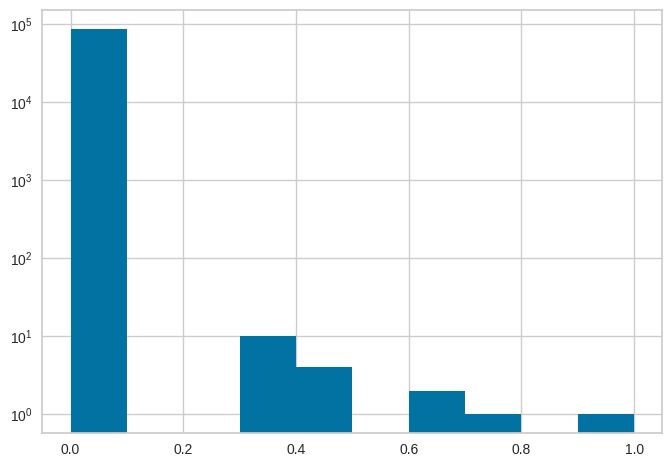

In [ ]:
plt.hist(y_lof)
plt.yscale('log')
plt.show()

In [ ]:
y_true.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: Class, dtype: int64

In [ ]:
y_lof[ y_lof > .9 ]

50112    1.0
Name: Anomaly_Score, dtype: float32

In [ ]:
y_true[50112]

0

In [ ]:
y_lof.shape

(85442,)

In [ ]:
y_true.shape

(85442,)

In [ ]:
mask = df_valid['Class'] == 1

In [ ]:
df_valid[mask]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
164,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
188,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
1861,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1
1916,7891.0,-1.585505,3.261585,-4.137422,2.357096,-1.405043,-1.879437,-3.513687,1.515607,-1.207166,...,0.501543,-0.546869,-0.076584,-0.425550,0.123644,0.321985,0.264028,0.132817,1.00,1
1952,8169.0,0.857321,4.093912,-7.423894,7.380245,0.973366,-2.730762,-1.496497,0.543015,-2.351190,...,0.375026,0.145400,0.240603,-0.234649,-1.004881,0.435832,0.618324,0.148469,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76255,156685.0,-0.129778,0.141547,-0.894702,-0.457662,0.810608,-0.504723,1.373588,-0.209476,0.208494,...,-0.032643,-0.246526,0.484108,0.359637,-0.435972,-0.248480,0.021527,0.109192,187.11,1
77496,158638.0,-5.976119,-7.196980,-5.388316,5.104799,4.676533,-5.566870,-4.291180,0.876531,-1.075478,...,1.459369,-0.136262,0.848177,-0.269916,-1.095060,-0.710905,0.565846,-1.034107,296.00,1
78932,160791.0,2.132386,0.705608,-3.530759,0.514779,1.527175,-1.716268,1.132791,-0.574214,0.128904,...,0.163739,0.703910,-0.245076,0.460049,0.920281,-0.216586,-0.026219,-0.025001,1.00,1
78996,160895.0,-0.848290,2.719882,-6.199070,3.044437,-3.301910,-1.992117,-3.734902,1.520079,-2.548788,...,1.125229,0.805258,0.199119,0.035206,0.012159,0.601658,0.137468,-0.171397,127.14,1


In [ ]:
predictions_lof[mask]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Anomaly,Anomaly_Score
164,406.0,-2.312227,1.951992,-1.609851,3.997905,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.000000,0,0.988556
188,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.000000,0,1.424506
1861,7526.0,0.008430,4.137837,-6.240696,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.000000,0,1.210355
1916,7891.0,-1.585505,3.261585,-4.137422,2.357096,-1.405043,-1.879437,-3.513687,1.515607,-1.207166,...,-0.546869,-0.076584,-0.425550,0.123644,0.321985,0.264028,0.132817,1.000000,0,0.999390
1952,8169.0,0.857321,4.093912,-7.423893,7.380245,0.973366,-2.730762,-1.496497,0.543015,-2.351190,...,0.145400,0.240603,-0.234649,-1.004881,0.435832,0.618324,0.148469,1.000000,0,1.215208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76255,156685.0,-0.129778,0.141547,-0.894702,-0.457662,0.810608,-0.504723,1.373587,-0.209476,0.208494,...,-0.246526,0.484108,0.359637,-0.435972,-0.248480,0.021527,0.109192,187.110001,0,2.813704
77496,158638.0,-5.976120,-7.196980,-5.388316,5.104799,4.676533,-5.566870,-4.291181,0.876531,-1.075478,...,-0.136262,0.848177,-0.269916,-1.095060,-0.710905,0.565846,-1.034107,296.000000,0,1.892954
78932,160791.0,2.132386,0.705608,-3.530759,0.514779,1.527175,-1.716268,1.132791,-0.574214,0.128904,...,0.703910,-0.245076,0.460049,0.920281,-0.216586,-0.026219,-0.025001,1.000000,0,1.627981
78996,160895.0,-0.848290,2.719882,-6.199070,3.044437,-3.301909,-1.992117,-3.734902,1.520079,-2.548788,...,0.805258,0.199119,0.035206,0.012159,0.601658,0.137468,-0.171397,127.139999,0,1.039710


In [ ]:
y_true[mask]

164      1
188      1
1861     1
1916     1
1952     1
        ..
76255    1
77496    1
78932    1
78996    1
82863    1
Name: Class, Length: 139, dtype: int64

In [ ]:
y_lof[mask]

164      0.000244
188      0.001427
1861     0.000846
1916     0.000274
1952     0.000859
           ...   
76255    0.005198
77496    0.002699
78932    0.001980
78996    0.000383
82863    0.000427
Name: Anomaly_Score, Length: 139, dtype: float32

In [ ]:
y_lof[mask].max()

0.0070004193

In [ ]:
# Lastly, we check the values from knn
y_knn.value_counts()

0.003489    6
0.000128    6
0.016639    6
0.000000    6
0.000004    5
           ..
0.025751    1
0.019565    1
0.032433    1
0.013118    1
0.004446    1
Name: Anomaly_Score, Length: 81943, dtype: int64

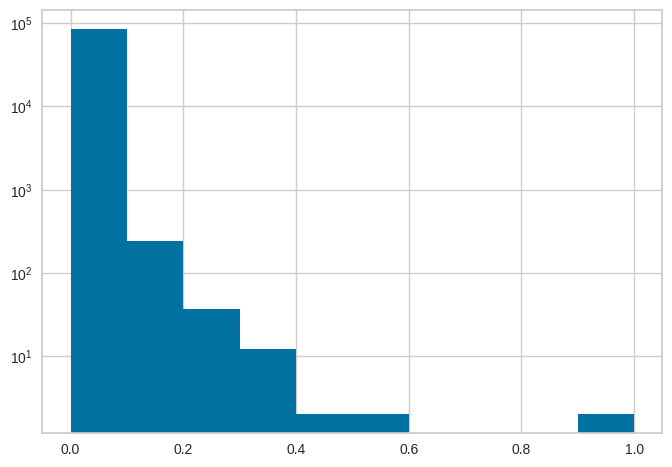

In [ ]:
plt.hist(y_knn)
plt.yscale('log')
plt.show()

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

In [ ]:
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_true, y_rf)

precision_xg, recall_xg, thresholds_xg = precision_recall_curve(y_true, y_xg)

precision_lof, recall_lof, thresholds_lof = precision_recall_curve(y_true, y_lof)

precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_true, y_knn)


In [ ]:
precision_lof

array([0.00162683, 0.00162685, 0.00162687, ..., 0.        , 0.        ,
       1.        ])

In [ ]:
precision_rf

array([0.00162683, 0.05185865, 0.14786585, 0.25428571, 0.35102041,
       0.43010753, 0.52083333, 0.5648855 , 0.60176991, 0.60576923,
       0.62105263, 0.61627907, 0.62820513, 0.63888889, 0.67692308,
       0.70967742, 0.70175439, 0.72      , 0.68888889, 0.70454545,
       0.70731707, 0.71052632, 0.71428571, 0.73529412, 0.75      ,
       0.74193548, 0.75862069, 0.73076923, 0.73913043, 0.77272727,
       0.73684211, 0.70588235, 0.6875    , 0.64285714, 0.61538462,
       0.58333333, 0.63636364, 0.7       , 0.625     , 0.5       ,
       0.6       , 0.        , 1.        ])

In [ ]:
recall_rf

array([1.        , 0.81294964, 0.69784173, 0.64028777, 0.61870504,
       0.57553957, 0.53956835, 0.5323741 , 0.48920863, 0.45323741,
       0.42446043, 0.38129496, 0.35251799, 0.33093525, 0.31654676,
       0.31654676, 0.28776978, 0.25899281, 0.22302158, 0.22302158,
       0.20863309, 0.1942446 , 0.17985612, 0.17985612, 0.17266187,
       0.16546763, 0.15827338, 0.13669065, 0.12230216, 0.12230216,
       0.10071942, 0.08633094, 0.07913669, 0.0647482 , 0.05755396,
       0.05035971, 0.05035971, 0.05035971, 0.03597122, 0.02158273,
       0.02158273, 0.        , 0.        ])

In [ ]:
thresholds_rf

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.42857143, 0.44897959, 0.46938776, 0.48979592, 0.51020408,
       0.53061224, 0.55102041, 0.57142857, 0.6122449 , 0.63265306,
       0.65306122, 0.71428571, 0.73469388, 0.75510204, 0.7755102 ,
       0.79591837, 0.83673469, 0.87755102, 0.89795918, 0.91836735,
       0.95918367, 1.        ])

In [ ]:
thresholds_rf_pad = np.concatenate([np.zeros(1) , thresholds_rf])
thresholds_xg_pad = np.concatenate([np.zeros(1) , thresholds_xg])
thresholds_lof_pad = np.concatenate([np.zeros(1) , thresholds_lof])
thresholds_knn_pad = np.concatenate([np.zeros(1) , thresholds_knn])



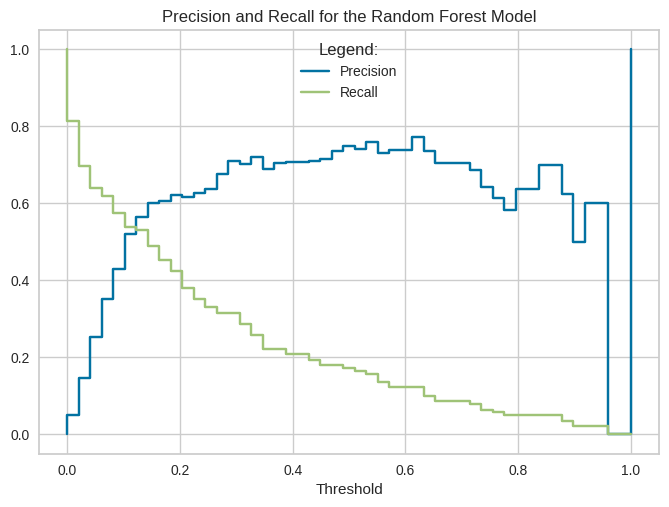

In [ ]:


plt.step(thresholds_rf_pad, precision_rf, where='post', label='Precision')

plt.step(thresholds_rf_pad, recall_rf, where='post', label='Recall')


plt.xlabel('Threshold')

plt.legend(title='Legend:')
plt.title('Precision and Recall for the Random Forest Model')
plt.show()


 The best Precision-Recall pair for the Random Forest Model is: Prec =  0.5648854961832062  and Recall =  0.5323741007194245


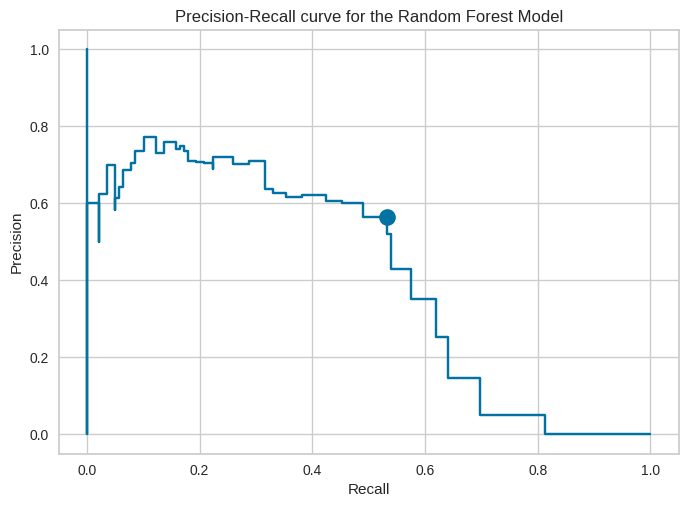

In [ ]:
# Compute optimal threshold:

len = precision_rf.shape[0]
dist = np.zeros( len )

x = range( len )
for n in x:
  dist[n] = np.sqrt( (1-precision_rf[n])**2 + (1-recall_rf[n])**2 )

index = np.argmin(dist)  # Index where (prec, recall) has minimum distance to the optimal point (1,1)

optimal_prec_rf = precision_rf[index]

optimal_recall_rf = recall_rf[index]

print(' The best Precision-Recall pair for the Random Forest Model is: Prec = ', optimal_prec_rf, ' and Recall = ', optimal_recall_rf)


#Plot the Prec-Recall curve

pr_display_rf = PrecisionRecallDisplay(precision=precision_rf, recall=recall_rf).plot()
plt.title('Precision-Recall curve for the Random Forest Model')

plt.plot(optimal_recall_rf,optimal_prec_rf, 'bo', linewidth=2, markersize=12)  # plot x and y using blue circle markers

plt.show()


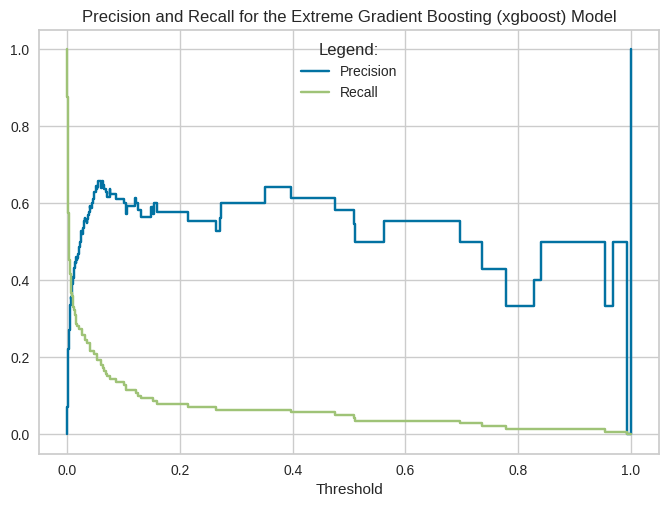

In [ ]:
plt.step(thresholds_xg_pad, precision_xg, where='post', label='Precision')

plt.step(thresholds_xg_pad, recall_xg, where='post', label='Recall')


plt.xlabel('Threshold')

plt.legend(title='Legend:')
plt.title('Precision and Recall for the Extreme Gradient Boosting (xgboost) Model')
plt.show()


 The best Precision-Recall pair for the Extreme Gradient Boosting (xgboost) Model is: Prec =  0.21411764705882352  and Recall =  0.6546762589928058


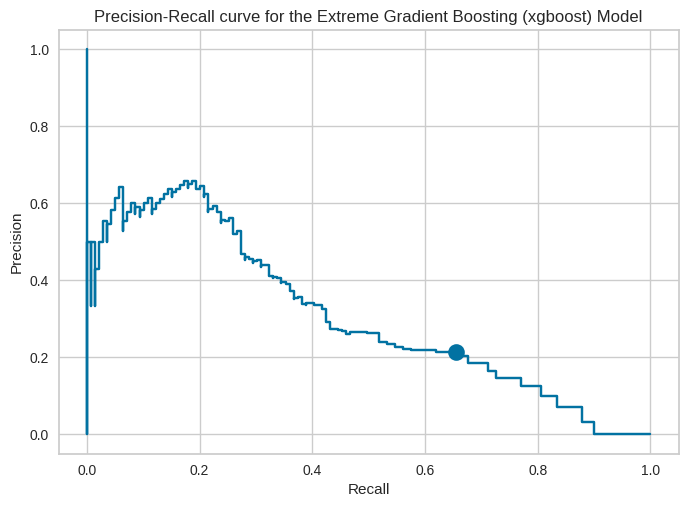

In [ ]:
# Compute optimal threshold:

len = precision_xg.shape[0]
dist = np.zeros( len )

x = range( len )
for n in x:
  dist[n] = np.sqrt( (1-precision_xg[n])**2 + (1-recall_xg[n])**2 )

index = np.argmin(dist)  # Index where (prec, recall) has minimum distance to the optimal point (1,1)

optimal_prec_xg = precision_xg[index]

optimal_recall_xg = recall_xg[index]

print(' The best Precision-Recall pair for the Extreme Gradient Boosting (xgboost) Model is: Prec = ', optimal_prec_xg, ' and Recall = ', optimal_recall_xg)


#Plot the Prec-Recall curve


pr_display_xg = PrecisionRecallDisplay(precision=precision_xg, recall=recall_xg).plot()
plt.title('Precision-Recall curve for the Extreme Gradient Boosting (xgboost) Model')

plt.plot(optimal_recall_xg,optimal_prec_xg, 'bo', linewidth=2, markersize=12)  # plot x and y using blue circle markers

plt.show()

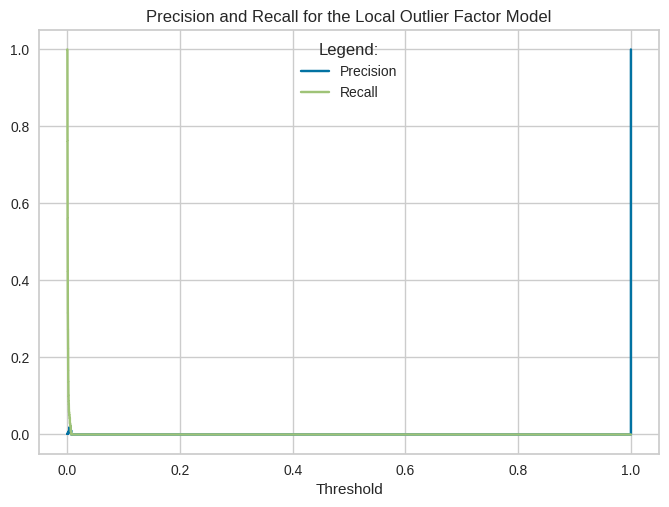

In [ ]:
plt.step(thresholds_lof_pad, precision_lof, where='post', label='Precision')

plt.step(thresholds_lof_pad, recall_lof, where='post', label='Recall')


plt.xlabel('Threshold')

plt.legend(title='Legend:')
plt.title('Precision and Recall for the Local Outlier Factor Model')
plt.show()


 The best Precision-Recall pair for the Local Outlier Factor Model is: Prec =  0.001666506809898331  and Recall =  1.0


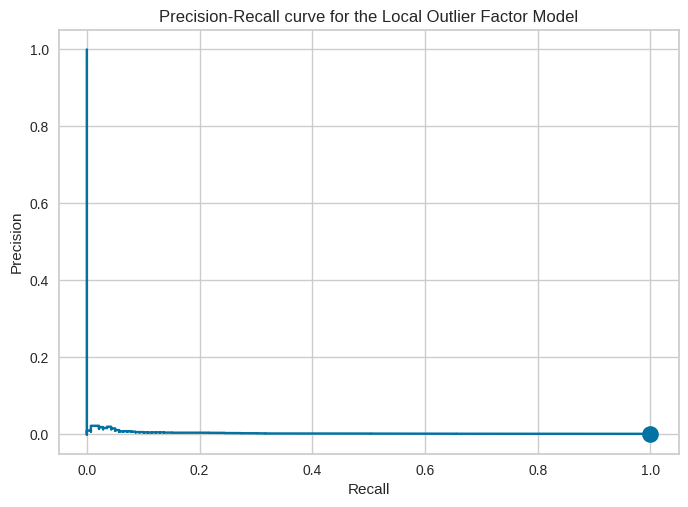

In [ ]:
# Compute optimal threshold:

len = precision_lof.shape[0]
dist = np.zeros( len )

x = range( len )
for n in x:
  dist[n] = np.sqrt( (1-precision_lof[n])**2 + (1-recall_lof[n])**2 )

index = np.argmin(dist)  # Index where (prec, recall) has minimum distance to the optimal point (1,1)

optimal_prec_lof = precision_lof[index]

optimal_recall_lof = recall_lof[index]

print(' The best Precision-Recall pair for the Local Outlier Factor Model is: Prec = ', optimal_prec_lof, ' and Recall = ', optimal_recall_lof)


#Plot the Prec-Recall curve

pr_display_lof = PrecisionRecallDisplay(precision=precision_lof, recall=recall_lof).plot()
plt.title('Precision-Recall curve for the Local Outlier Factor Model')

plt.plot(optimal_recall_lof,optimal_prec_lof, 'bo', linewidth=2, markersize=12)  # plot x and y using blue circle markers

plt.show()

In [ ]:
# Why is Precision so low for lof ?

precision_lof

array([0.00162683, 0.00162685, 0.00162687, ..., 0.        , 0.        ,
       1.        ])

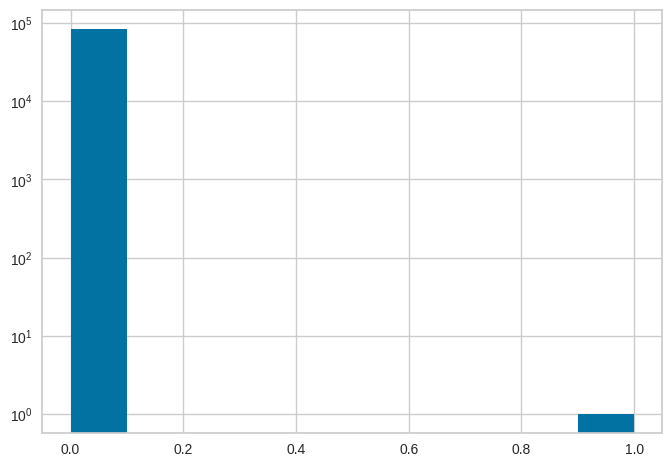

In [ ]:
plt.hist(precision_lof)
plt.yscale('log')
plt.show()

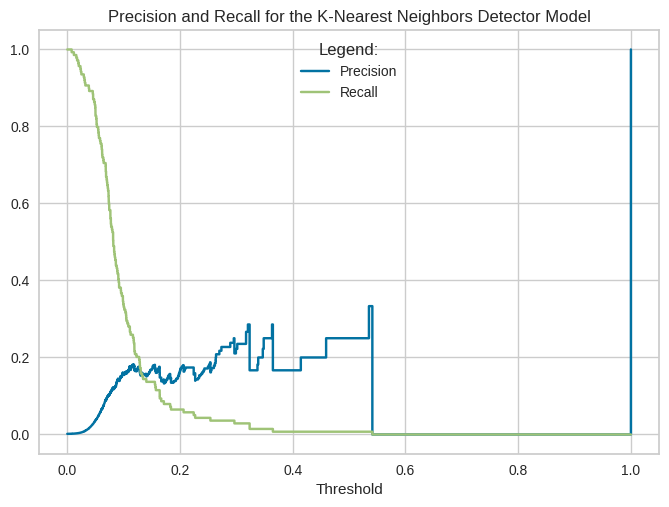

In [ ]:
plt.step(thresholds_knn_pad, precision_knn, where='post', label='Precision')

plt.step(thresholds_knn_pad, recall_knn, where='post', label='Recall')


plt.xlabel('Threshold')

plt.legend(title='Legend:')
plt.title('Precision and Recall for the K-Nearest Neighbors Detector Model')
plt.show()


 The best Precision-Recall pair for the K-Nearest Neighbors Detector Model is: Prec =  0.09032258064516129  and Recall =  0.7050359712230215


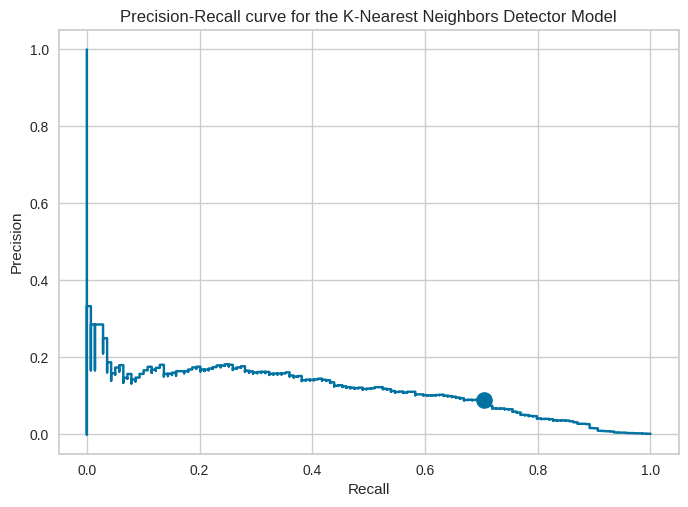

In [ ]:
# Compute optimal threshold:

len = precision_knn.shape[0]
dist = np.zeros( len )

x = range( len )
for n in x:
  dist[n] = np.sqrt( (1-precision_knn[n])**2 + (1-recall_knn[n])**2 )

index = np.argmin(dist)  # Index where (prec, recall) has minimum distance to the optimal point (1,1)

optimal_prec_knn = precision_knn[index]

optimal_recall_knn = recall_knn[index]

print(' The best Precision-Recall pair for the K-Nearest Neighbors Detector Model is: Prec = ', optimal_prec_knn, ' and Recall = ', optimal_recall_knn)


#Plot the Prec-Recall curve


pr_display_knn = PrecisionRecallDisplay(precision=precision_knn, recall=recall_knn).plot()
plt.title('Precision-Recall curve for the K-Nearest Neighbors Detector Model')

plt.plot(optimal_recall_knn,optimal_prec_knn, 'bo', linewidth=2, markersize=12)  # plot x and y using blue circle markers

plt.show()

In [ ]:
# Why are the results from the CV not matching similar in performance to the validation set?